In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Softmax_data.csv')

In [4]:
x = df.iloc[:,:2]
y = df.iloc[:,-1]

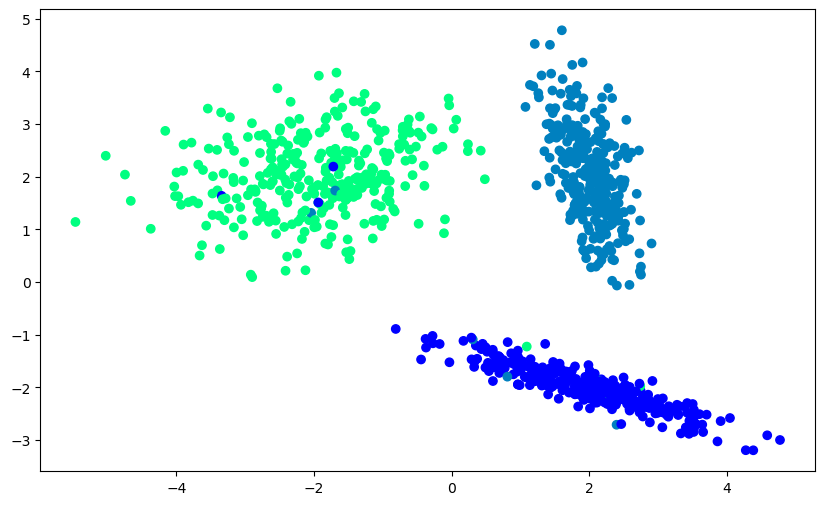

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=y,cmap='winter')

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [7]:
clf = LogisticRegression(multi_class= 'multinomial', penalty = None)

In [8]:
clf.fit(x , y)

LogisticRegression(multi_class='multinomial', penalty=None)

In [9]:
coefficients = clf.coef_ 
intercepts = clf.intercept_

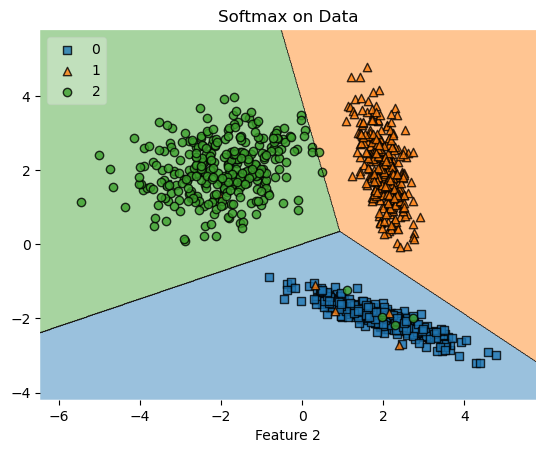

In [10]:
from mlxtend.plotting import plot_decision_regions


X1= x.to_numpy()

plot_decision_regions(x.values, y.values, clf, legend=2)

# Adding axes annotations
plt.xlabel('Feature 1')
plt.xlabel('Feature 2')
plt.title('Softmax on Data')

plt.show()

In [11]:
class Softmax_Regression:

    import numpy as np
    
    def initial_weights(self, classes, features):
        w = []
        for i in range(classes):
            w.append(np.zeros(features))
        return np.array(w)

    def softmax(self , z):
        exp_z = np.exp(z) 
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def prediction(self, x, w):
        y_hat = []
        
        for i in range(len(w)):
            
            sum = w[i][0] + np.dot(x[1:], w[i][1:]) 
            y_hat.append(sum)

        exp_y_hat = np.exp(y_hat) 
            
        return exp_y_hat / np.sum(exp_y_hat)

    
    def train_softmax(self , x, y, classes, learning_rate=0.01, epochs=100):
        
        m, n = x.shape
        
        w = self.initial_weights(classes, n)
    
        
        for epoch in range(epochs):
            w_diff = []
            
            for i in range(classes):
                diff = 0
            
                for j in range(m):
                   
                    if y[j] == i:
                        diff = diff + np.dot(x[j] , (1 - self.prediction(x[j] , w)[i]))
                    else:
                        diff = diff + np.dot(x[j] , (-1) * self.prediction(x[j] , w)[i])
    
                w_diff.append(w[i] + learning_rate * (diff / m))
            
            w = np.array(w_diff)
        
        return w

    def predict(self , X , w):
        scores = np.dot(X, w.T)
        probabilities = self.softmax(scores)
        
        return np.argmax(probabilities, axis=1)

X = x.to_numpy()

X = np.hstack((np.ones(1000).reshape(-1, 1), X))

In [12]:
Softmax = Softmax_Regression()

In [13]:
w = Softmax.train_softmax(X , y , 3 , 0.5 , 2500)

In [14]:
w

array([[ 0.97901606, -0.43210404, -1.65952472],
       [-1.93872275,  1.64361535,  1.20654699],
       [ 0.95970668, -1.2115113 ,  0.45297774]])

In [15]:
y_pred = Softmax.predict(X , w)

In [16]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y,y_pred))

0.985


Text(0.5, 1.0, 'Model Prediction')

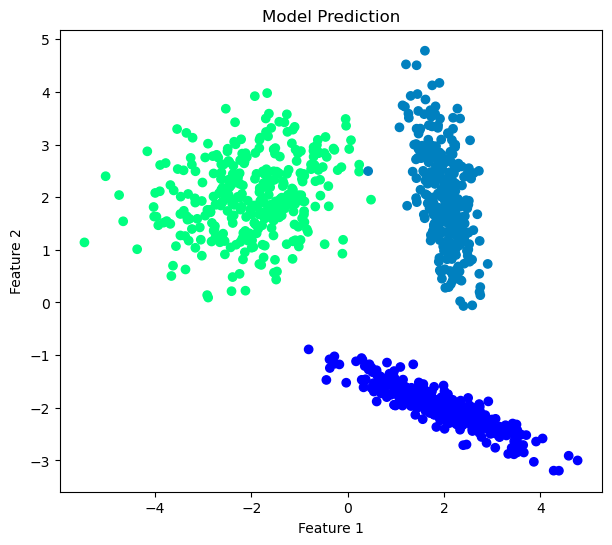

In [17]:
plt.figure(figsize=(7,6))
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=y_pred,cmap='winter')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Model Prediction")

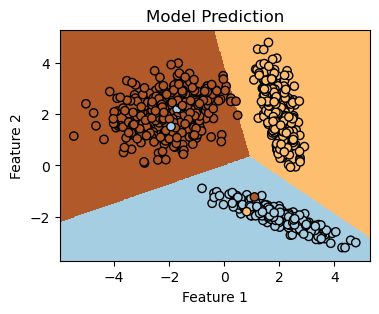

In [18]:
x1 = x.to_numpy()

x_min, x_max = x1[:, 0].min() - .5, x1[:, 0].max() + .5
y_min, y_max = x1[:, 1].min() - .5, x1[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(x1[:, 0], x1[:, 1], c=y, edgecolors='k',
            cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Model Prediction")
plt.show()